In [1]:
from dtuprosys.chemometrics.datasets import load_train_data
import matplotlib.pyplot as plt

from chemotools.derivative import SavitzkyGolay
from chemotools.scatter import MultiplicativeScatterCorrection, StandardNormalVariate
from chemotools.smooth import SavitzkyGolayFilter

In [2]:
spectra, hplc = load_train_data()
spectra = spectra.loc[:, 950:1400]

In [36]:
import numpy as np
from scipy.interpolate import CubicSpline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

from chemotools.utils.check_inputs import check_input

class CubicSplineCorrection(BaseEstimator, TransformerMixin):
    def __init__(self, indices: tuple = (0, -1)) -> None:
        self.indices = indices

    def fit(self, X: np.ndarray, y=None) -> "SplineCorrection":
        # Check that X is a 2D array and has only finite values
        X = check_input(X)

        # Set the number of features
        self.n_features_in_ = X.shape[1]

        # Set the fitted attribute to True
        self._is_fitted = True

        return self

    def transform(self, X: np.ndarray, y=None, copy=True):
        # Check that the estimator is fitted
        check_is_fitted(self, "_is_fitted")

        # Check that X is a 2D array and has only finite values
        X = check_input(X)
        X_ = X.copy()

        # Check that the number of features is the same as the fitted data
        if X_.shape[1] != self.n_features_in_:
            raise ValueError(f"Expected {self.n_features_in_} features but got {X_.shape[1]}")

        # Calculate spline baseline correction
        for i, x in enumerate(X_):
            X_[i] = self._spline_baseline_correct(x)
        return X_.reshape(-1, 1) if X_.ndim == 1 else X_

    def _spline_baseline_correct(self, x: np.ndarray) -> np.ndarray:
        indices = np.array(self.indices)
        intensity = x[indices]
        spl = CubicSpline(indices, intensity)
        baseline = spl(range(len(x)))      
        return x - baseline

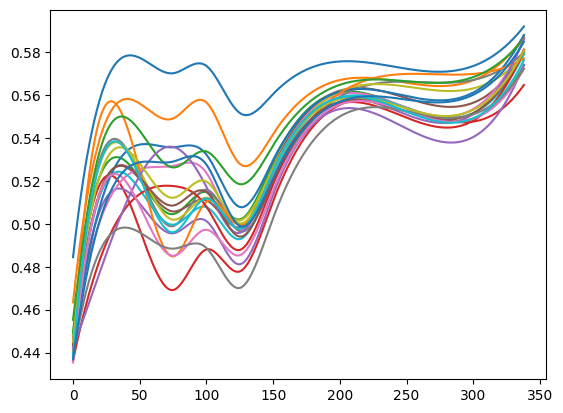

In [37]:
drift_corrected = CubicSplineCorrection((0, 50, 75, 100, 125, 150, 200, 338)).fit_transform(spectra)
plt.plot(drift_corrected.T)

In [5]:
spectrum = spectra.iloc[0].to_numpy()
spectrum

array([0.484434, 0.485629, 0.488754, 0.491942, 0.489923, 0.492869,
       0.497285, 0.501567, 0.500027, 0.50265 , 0.504031, 0.507229,
       0.507979, 0.510819, 0.510134, 0.52021 , 0.517008, 0.520256,
       0.519134, 0.525934, 0.52327 , 0.530606, 0.529451, 0.528332,
       0.538822, 0.533181, 0.53875 , 0.542191, 0.542244, 0.545774,
       0.546591, 0.544224, 0.546459, 0.551036, 0.553334, 0.556454,
       0.553465, 0.558983, 0.560916, 0.55795 , 0.558521, 0.566159,
       0.564407, 0.566028, 0.568479, 0.567493, 0.573624, 0.575462,
       0.5753  , 0.577093, 0.577257, 0.582415, 0.582413, 0.582927,
       0.58213 , 0.584501, 0.584462, 0.583777, 0.581544, 0.590941,
       0.588938, 0.587698, 0.588341, 0.589064, 0.583842, 0.58653 ,
       0.583313, 0.581686, 0.583783, 0.579995, 0.578197, 0.579116,
       0.572342, 0.569611, 0.568266, 0.570061, 0.574083, 0.581476,
       0.578952, 0.586104, 0.586328, 0.587365, 0.590726, 0.593094,
       0.592451, 0.595229, 0.599291, 0.59359 , 0.594947, 0.594

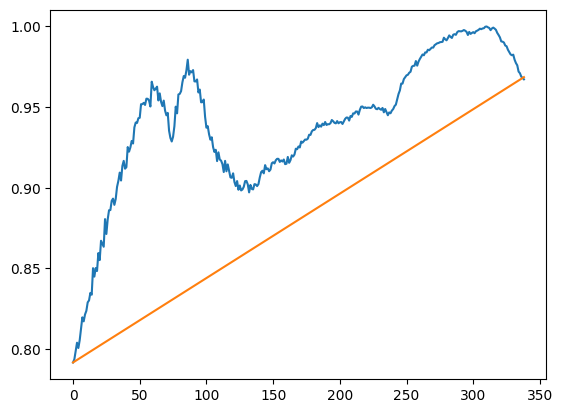

In [31]:
from scipy import interpolate
spectrum = spectrum/np.max(spectrum)
x = [0, 337]
y = spectrum[x]

spl = interpolate.CubicSpline(x, y)

xs = range(len(spectrum))
spline = spl(xs)

plt.plot(spectrum)
plt.plot(spline)


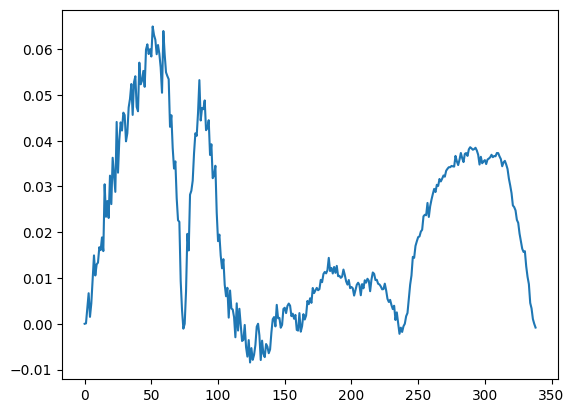

In [27]:
splines = np.interp(range(len(spectrum)), x, y)

plt.plot(spectrum - splines)

In [44]:
xx = ()
is_empty(xx)

NameError: name 'is_empty' is not defined